/var/folders/sz/byw7vv3s0yb0nppz6svp8lq80000gn/T/ipykernel_56189/3386207.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_words['paper_text_processed'] = key_words.map(lambda x: re.sub('[,\.!?]', '', x))


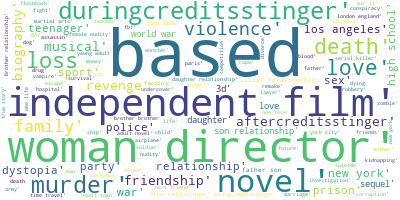

In [1]:

#URL: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
# papers = pd.read_csv('C:/Users/corts033/Documents/Personal/Geo Tech/CSE 6242/Project/CSE6242_Project_main_data_cleaned_movie_and_credits.txt')
papers = pd.read_csv('./data/cleaned_movie_credits_actors.csv')
# Print head
papers["keywords_list"].head()

key_words = papers["keywords_list"]

# Load the regular expression library
import re
# Remove punctuation
key_words['paper_text_processed'] = key_words.map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
key_words['paper_text_processed'] = key_words['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
key_words['paper_text_processed'].head()


# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(key_words['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [9]:


import gensim
from gensim.utils import simple_preprocess
import nltk
import numpy as np

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','film','on','based','director','based'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = key_words.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

word_lines = [','.join(line) for line in data_words]
word_text = '\n'.join(word_lines)
with open('./data/cleaned_words.txt', 'w') as f:
    f.write(word_text)


[nltk_data] Downloading package stopwords to /Users/dev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['culture', 'clash', 'future', 'space', 'war', 'space', 'colony', 'society', 'space', 'travel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alien', 'planet', 'cgi', 'marine', 'soldier', 'battle', 'love', 'affair', 'anti', 'war', 'power', 'relations', 'mind', 'soul']


In [3]:

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

from pprint import pprint
# number of topics
num_topics = 8
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 4), (21, 1), (22, 1), (23, 2)]
[(0,
  '0.014*"independent" + 0.013*"love" + 0.010*"drug" + 0.008*"school" + '
  '0.007*"new" + 0.007*"death" + 0.007*"war" + 0.006*"murder" + 0.005*"woman" '
  '+ 0.005*"novel"'),
 (1,
  '0.017*"relationship" + 0.012*"love" + 0.009*"brother" + 0.008*"father" + '
  '0.007*"new" + 0.007*"woman" + 0.006*"novel" + 0.006*"son" + 0.005*"drug" + '
  '0.005*"prison"'),
 (2,
  '0.014*"relationship" + 0.006*"sport" + 0.006*"brother" + 0.005*"alien" + '
  '0.005*"sister" + 0.005*"family" + 0.004*"sex" + 0.004*"father" + '
  '0.004*"love" + 0.004*"novel"'),
 (3,
  '0.009*"woman" + 0.008*"relationship" + 0.008*"murder" + 0.007*"violence" + '
  '0.006*"independent" + 0.005*"war" + 0.005*"new" + 0.005*"school" + '
  '0.005*"comedy" + 0.005*"nudity"'),
 (4,
  '0.012*"novel" + 0.009*"woman" + 0.008

In [5]:

import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.gensim_models
#import pyLDAvis.gensim
#from pyLDAvis import gensim
import pickle 
#import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./eda/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    #LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './eda/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.017519 -0.019455       1        1  16.742593
0     -0.002489 -0.037515       2        1  14.503501
7     -0.012456  0.002646       3        1  13.021258
5      0.027801 -0.008881       4        1  12.531521
6      0.088314  0.032406       5        1  12.279848
4      0.021811  0.037092       6        1  11.319307
3     -0.023644 -0.074607       7        1  10.923475
2     -0.081818  0.068314       8        1   8.678498, topic_info=              Term        Freq       Total Category  logprob  loglift
187   relationship  432.000000  432.000000  Default  30.0000  30.0000
1847   independent  281.000000  281.000000  Default  29.0000  29.0000
50           novel  219.000000  219.000000  Default  28.0000  28.0000
20           space  139.000000  139.000000  Default  27.0000  27.0000
10            love  322.000000  322.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
508          child   10.786612  125.002811   Topic8  -6.0043  -0.0057
390            car   11.182603  159.805037   Topic8  -5.9682  -0.2153
153          world   10.373846  162.597118   Topic8  -6.0433  -0.3077
384       dystopia   10.048718  122.666996   Topic8  -6.0751  -0.0577
225           loss    9.969082  166.979621   Topic8  -6.0831  -0.3741

[679 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
24        1  0.037738  abuse
24        2  0.283036  abuse
24        3  0.301905  abuse
24        4  0.037738  abuse
24        5  0.094345  abuse
...     ...       ...    ...
249       6  0.221001  young
249       7  0.091001  young
249       8  0.117001  young
956       3  0.232156   zeus
956       6  0.464313   zeus

[2037 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 8, 6, 7, 5, 4, 3])

In [26]:
#Histogram of keywords


'o
